In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import random 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [0]:
X = np.random.uniform(1, 200, size = (100, 30))

In [111]:
X

array([[186.23153622,  32.57322833, 103.73221901, ...,  10.71838575,
         64.22248908, 100.04087438],
       [ 39.99410121,  51.57022338,  22.26816877, ..., 120.58675829,
        148.25529021,  52.10302907],
       [136.99129769, 116.21100032, 183.32139851, ..., 135.24786254,
        101.23399879,  91.44485182],
       ...,
       [ 17.75873939,  34.47887764, 107.59426325, ...,  72.80985158,
         52.33485248,  34.27421065],
       [ 51.02703533,  82.42023379,  89.10045898, ..., 153.92068692,
        180.91172867,  89.11615984],
       [ 33.33309604,  60.98429014,  26.46028567, ..., 140.68005306,
         88.98199721, 148.12516871]])

In [112]:
X.shape

(100, 30)

In [0]:
X[(X > 10) & (X < 60)] = np.nan

In [114]:
X

array([[186.23153622,          nan, 103.73221901, ...,          nan,
         64.22248908, 100.04087438],
       [         nan,          nan,          nan, ..., 120.58675829,
        148.25529021,          nan],
       [136.99129769, 116.21100032, 183.32139851, ..., 135.24786254,
        101.23399879,  91.44485182],
       ...,
       [         nan,          nan, 107.59426325, ...,  72.80985158,
                 nan,          nan],
       [         nan,  82.42023379,  89.10045898, ..., 153.92068692,
        180.91172867,  89.11615984],
       [         nan,  60.98429014,          nan, ..., 140.68005306,
         88.98199721, 148.12516871]])

In [115]:
print("Printing NAN values across columns")
  
for i in range(X.shape[1]):
  print(f"column {i} : {np.isnan(X[:, i]).sum()}")

print("Printing NAN values across rows")

for i in range(X.shape[0]):
  print(f"row {i} : {np.isnan(X[i, :]).sum()}")

    

Printing NAN values across columns
column 0 : 22
column 1 : 17
column 2 : 29
column 3 : 23
column 4 : 24
column 5 : 22
column 6 : 24
column 7 : 23
column 8 : 22
column 9 : 28
column 10 : 28
column 11 : 18
column 12 : 22
column 13 : 26
column 14 : 18
column 15 : 22
column 16 : 19
column 17 : 22
column 18 : 21
column 19 : 31
column 20 : 13
column 21 : 23
column 22 : 28
column 23 : 25
column 24 : 19
column 25 : 32
column 26 : 28
column 27 : 21
column 28 : 26
column 29 : 27
Printing NAN values across rows
row 0 : 6
row 1 : 8
row 2 : 8
row 3 : 8
row 4 : 6
row 5 : 9
row 6 : 6
row 7 : 4
row 8 : 5
row 9 : 6
row 10 : 8
row 11 : 8
row 12 : 8
row 13 : 10
row 14 : 10
row 15 : 9
row 16 : 6
row 17 : 7
row 18 : 8
row 19 : 14
row 20 : 6
row 21 : 7
row 22 : 4
row 23 : 13
row 24 : 3
row 25 : 6
row 26 : 8
row 27 : 6
row 28 : 3
row 29 : 6
row 30 : 8
row 31 : 8
row 32 : 7
row 33 : 6
row 34 : 11
row 35 : 8
row 36 : 6
row 37 : 8
row 38 : 5
row 39 : 5
row 40 : 7
row 41 : 9
row 42 : 10
row 43 : 5
row 44 : 6
ro

In [116]:
type(X)

numpy.ndarray

In [0]:
means = np.nanmean(X, axis=0)

In [0]:
indices = np.where(np.isnan(X))

In [119]:
indices

(array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
         2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
         4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
         7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9, 10, 10,
        10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12,
        12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
        14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18,
        18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
        19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22,
        22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24,
        25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27,
        27, 27, 27, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30,
        30, 

In [0]:
X[indices] = np.take(means, indices[1])

In [0]:
X = pd.DataFrame(X)

In [0]:
coerr = X.corr(method = 'pearson')

In [124]:
coerr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.078804,-0.003278,-0.083689,-0.015176,-0.089624,0.111515,-0.278884,-0.112818,-0.003542,-0.149854,-0.106181,0.161563,-0.102844,-0.094286,0.206768,-0.074540,0.219203,-0.005111,-0.028388,0.016407,0.248846,0.059329,0.171510,0.123771,-0.002182,0.034494,0.116310,-0.037835,-0.015093
1,0.078804,1.000000,-0.032564,-0.151050,-0.047488,-0.147789,0.059355,0.089785,0.267114,-0.089951,-0.049758,-0.005645,-0.105421,-0.206876,-0.125043,0.062180,-0.075892,0.086283,-0.037278,-0.162337,0.147509,0.129359,0.118072,0.027745,-0.067193,0.018161,-0.042873,0.133425,0.078994,-0.024493
2,-0.003278,-0.032564,1.000000,0.031257,0.139686,-0.018585,-0.104454,0.181116,0.013148,-0.196653,0.071263,-0.061993,-0.074591,0.069512,-0.006868,0.081600,-0.089544,0.037577,0.079417,0.189882,-0.064776,0.050369,0.063582,0.268431,0.145349,-0.062819,-0.043944,0.027322,-0.064877,0.209095
3,-0.083689,-0.151050,0.031257,1.000000,-0.034610,0.210027,-0.226935,0.152474,-0.167542,-0.150397,0.166304,0.047661,-0.175531,0.021579,-0.014479,-0.132114,-0.153533,-0.103745,-0.047152,-0.033160,-0.016372,-0.060432,-0.056927,-0.039793,-0.084876,0.017735,0.060644,-0.119408,-0.082795,0.025460
4,-0.015176,-0.047488,0.139686,-0.034610,1.000000,-0.101987,0.159938,0.119880,-0.101684,0.059483,-0.099886,-0.065802,-0.214490,0.079087,0.019210,0.118366,-0.031209,-0.006521,0.069645,0.081352,0.067682,-0.131191,0.038896,-0.023852,-0.175496,-0.033913,0.016751,0.000334,0.044270,0.015918
5,-0.089624,-0.147789,-0.018585,0.210027,-0.101987,1.000000,-0.134399,-0.012427,-0.043290,0.034256,0.035589,-0.081451,-0.004014,0.027767,-0.020365,-0.004918,0.071079,-0.150430,-0.056785,-0.054023,0.105533,0.081810,-0.127087,-0.027961,0.149541,-0.040650,0.070136,-0.048143,0.095157,-0.137010
6,0.111515,0.059355,-0.104454,-0.226935,0.159938,-0.134399,1.000000,0.024271,-0.029897,0.125381,-0.248401,-0.042011,-0.019860,0.027132,0.076643,-0.005816,-0.097999,0.076282,-0.137087,0.036712,-0.043539,-0.040561,0.048774,0.080103,-0.098939,0.051950,0.013434,-0.119982,0.210613,0.079195
7,-0.278884,0.089785,0.181116,0.152474,0.119880,-0.012427,0.024271,1.000000,0.040686,-0.047631,0.265546,-0.000123,-0.097633,0.031394,-0.094774,0.015389,0.126434,-0.018951,0.151680,0.128114,0.134947,-0.127947,-0.019003,0.077639,-0.098993,-0.025984,-0.107552,-0.077654,0.053534,0.107339
8,-0.112818,0.267114,0.013148,-0.167542,-0.101684,-0.043290,-0.029897,0.040686,1.000000,-0.006384,-0.134623,0.159186,-0.088266,-0.097382,-0.120869,-0.018398,-0.050467,-0.039794,-0.043418,0.018771,0.262469,-0.011134,0.080551,-0.027800,0.084429,-0.061173,-0.100618,-0.064372,0.007242,-0.009688
9,-0.003542,-0.089951,-0.196653,-0.150397,0.059483,0.034256,0.125381,-0.047631,-0.006384,1.000000,-0.192326,-0.123444,0.076177,-0.117120,0.113852,-0.070980,-0.003962,-0.027690,-0.229843,-0.032203,-0.016535,-0.025699,0.136063,-0.037197,-0.112559,-0.016394,0.069748,0.017065,-0.101960,0.089447


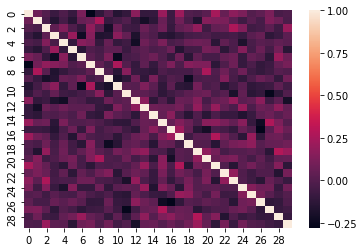

In [125]:
sns.heatmap(coerr)

In [131]:
count = 0
for i in range(30):
  for j in range(i, 30):
    if coerr[i][j] <= 0.7:
      count += 1
print(count)      

435


In [0]:
min_max_scaler = MinMaxScaler(feature_range=(0, 10))
X = pd.DataFrame(min_max_scaler.fit_transform(X))

In [141]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,9.398832,5.907229,5.325800,5.937694,8.419211,3.323780,9.847246,0.226941,3.560291,8.618654,0.158048,8.309311,4.219375,6.000596,9.564362,6.097846,6.337236,6.807935,2.951663,3.270362,0.000000,5.843920,8.924416,6.732889,4.705505,6.436305,5.256666,6.160520,3.056146,4.827723
1,6.154151,5.907229,5.939288,6.365787,4.570222,7.534609,9.062156,5.043167,4.402436,6.588972,6.004232,7.248139,6.084485,3.632496,9.333111,3.128551,5.926189,6.287665,4.832276,8.323290,6.563463,8.216531,6.164945,8.278495,0.377893,6.497997,6.891604,5.964236,7.488397,6.068718
2,6.823569,5.680818,9.460799,4.112738,5.590085,3.821467,8.906758,4.202861,8.110200,6.588972,5.836213,5.951612,5.748711,6.125150,4.458022,6.898489,6.337236,6.287665,0.000000,5.639063,4.284136,9.337360,6.164945,3.496145,9.566836,6.436305,4.290974,6.711851,5.008292,4.368931
3,5.543468,5.907229,6.902314,4.508059,6.324187,8.778120,6.717010,10.000000,9.882345,6.594322,6.004232,7.536967,3.477068,9.043247,9.443309,7.822271,7.496841,6.287665,5.040942,6.189647,6.101243,7.797389,3.112248,0.286707,5.052072,3.437281,6.096144,10.000000,6.007773,5.059612
4,6.154151,9.640322,0.221898,8.363939,7.473872,5.669463,8.657593,5.531029,3.466483,6.588972,6.004232,8.867709,0.237850,6.775887,6.496063,8.107763,4.617707,5.386204,5.037646,6.960299,9.830945,7.528205,4.964996,0.094778,6.481049,7.489313,6.609722,6.160520,6.418910,6.068718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.347522,7.043827,5.939288,3.736641,9.398895,6.595237,9.513499,3.227658,6.232797,7.844035,2.984382,3.698330,5.748711,6.125150,9.548015,7.936020,5.575244,5.693579,5.920901,4.597999,9.703121,0.043129,10.000000,5.581213,6.758863,6.436305,8.714584,8.377947,3.272788,4.522623
96,7.340442,4.446247,3.104060,5.937694,7.985160,6.968289,8.173289,0.282410,6.401299,6.588972,8.525785,6.084844,6.411075,9.903729,7.849238,5.513242,5.559277,4.063310,5.920901,7.504376,6.562237,5.843920,6.164945,5.581213,7.128010,5.855478,6.096144,5.041340,9.796113,2.979303
97,6.154151,5.907229,5.526450,0.246779,9.544354,5.110873,9.318128,4.878694,6.401299,6.588972,3.007910,8.819618,9.513331,7.905050,6.001727,4.438744,4.466948,9.561145,7.867897,10.000000,6.067365,6.498817,5.928527,5.581213,0.414593,9.578605,8.758804,3.527943,6.007773,6.068718
98,6.154151,3.918719,4.565617,5.937694,6.324187,8.499533,3.736712,5.107930,6.401299,9.897273,4.891652,6.768092,9.956905,8.081802,6.001727,3.643097,7.563518,4.666814,9.274729,6.189647,6.067365,5.843920,3.876688,3.393209,8.849393,8.715147,10.000000,7.664037,9.210838,4.244642


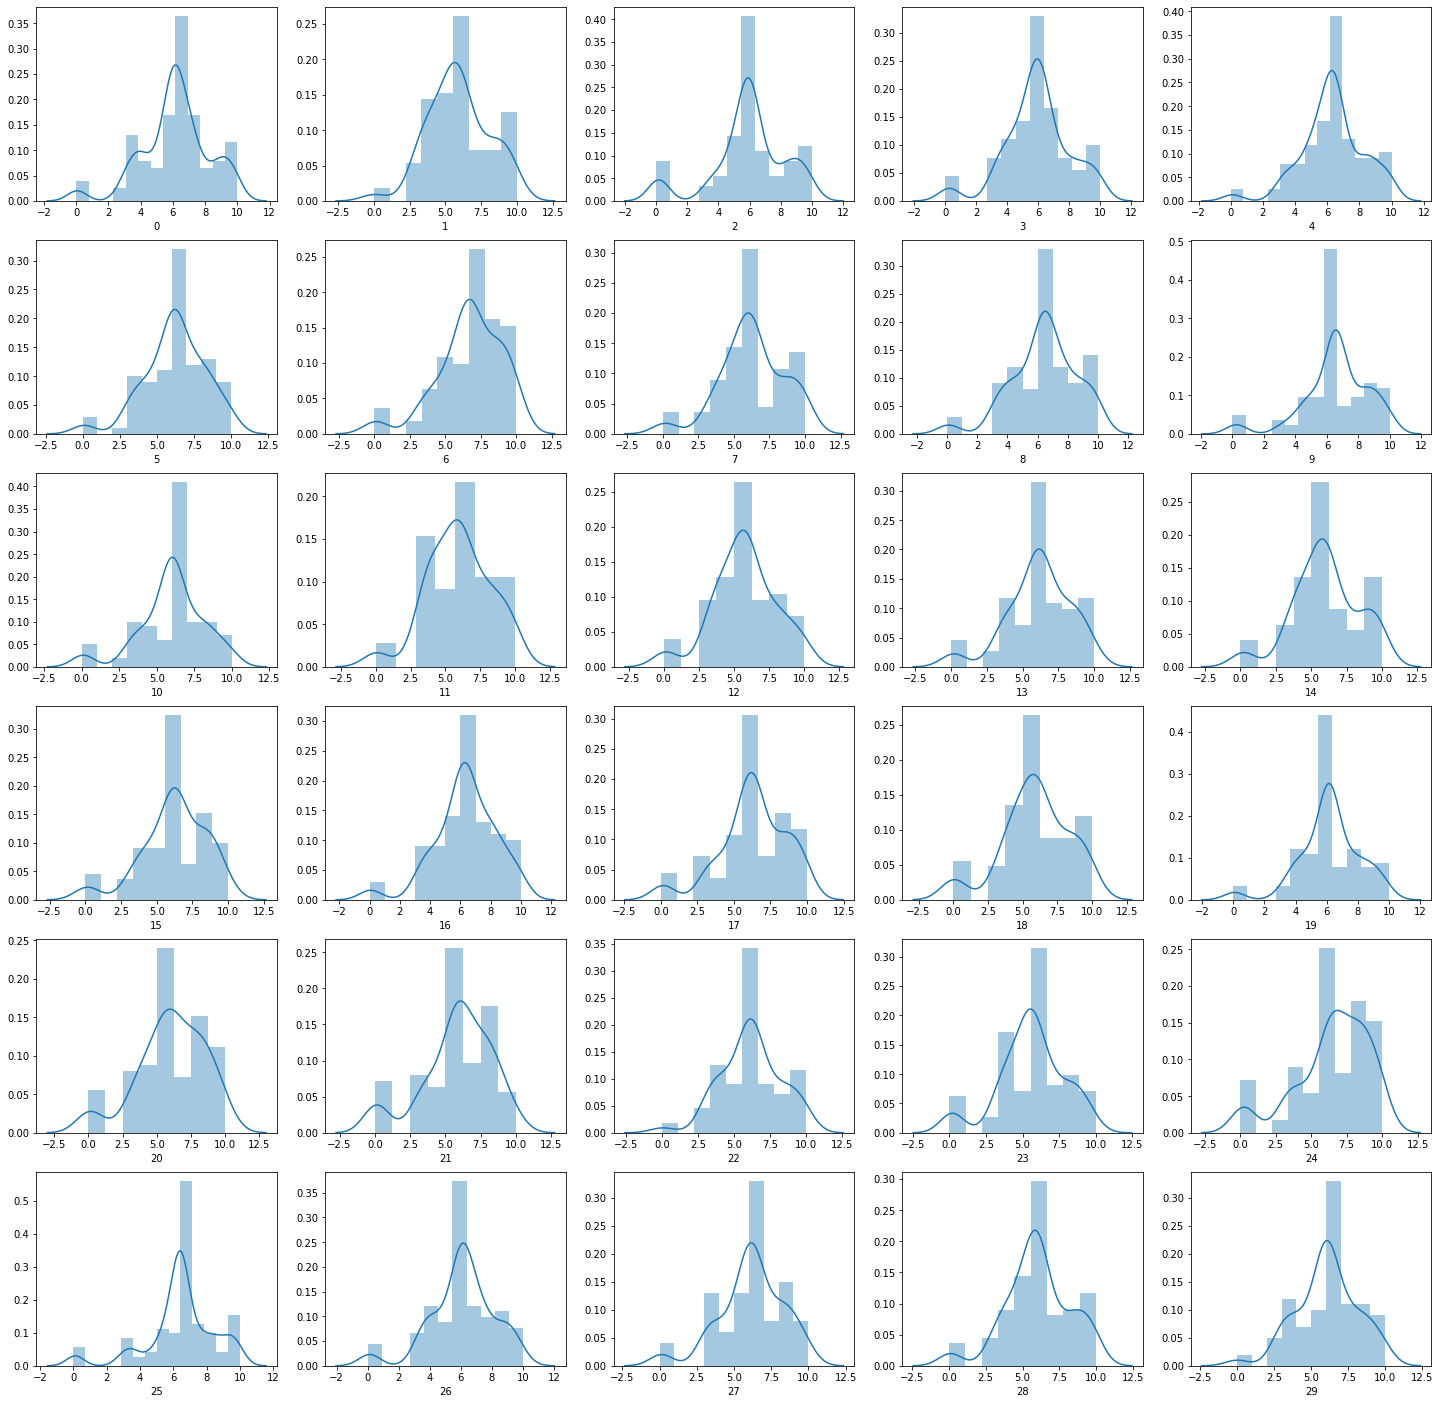

In [150]:
figure, axes = plt.subplots(nrows=6, ncols=5,figsize=(25,25))
col = 0
for i in range(6):
  for j in range(5):
    sns.distplot(X[col], ax=axes[i][j])
    col += 1